**Прежде всего сформилируем условия задачи:**

В отчете ответить на вопросы:
1.	Сколько участков Z-ДНК найдено в геноме?
2.	Сколько квадруплексов найдено в геноме?
3.	В какие участки генома (гены или межгеннное пространство или на пересечении) попадают Z-ДНК и квадруплексы. Аннотацию генома генами для выбранного организма скачать из TableBrowser -  Genes and Gene Prediction Track – GeneCode annotation tracks.
4.	Предоставить список генов, в промоторы которых попадает Z-ДНК. Промоторами считать участки от начала генов и upstream 1000 bp. При этом для генов на положительном и отрицательном стренде по-разному рассчитываются координаты промоторов. Для положительного стренда, если начало гена на координате 5000 bp, промоторный участок будет 4000-5000, а для отрицательного стренда 5000-6000. Имена вытаскиваются из предпоследней колонки таблицы.
5.	Предоставить список генов, в промоторы которых попадает квадруплексы.

6.	На 10 баллов – сделать Gene Enrichment Analysis – зайти на сайт stringDB https://string-db.org/. Нажать на Search. Выбрать слева Multiple Proteins - Найти нужный организм, в окно загрузить список генов и нажать Search. На вкладе Analysis будут результаты обогощения отобранных генов биологическими процессами. Сделать скриншот анализа. Выгрузить таблицу в Excel.



### Гуаниновые квадруплексы

![G-quadruplex[1].svg]()

Прежде всего я скачал последовательность для y-хромосомы с сайта ncbi (сам файл будет лежать на гугл диске)
https://drive.google.com/drive/folders/16Jn6fAJJrDpYjQi9UmvmbVzm6zlH1P17?usp=share_link

### Перенсем файл с последовательностью с диска в среду выполнения

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil
import os

# Укажем путь к исходному и конечной папке
src_folder = '/content/drive/MyDrive/HW7'
dst_folder = '/content'

# Забираем файлики
source_file_seq = os.path.join(src_folder, 'chrY.fasta')
source_file_code = os.path.join(src_folder, 'zhunt3-alan.c')

# А теперь скопируем файлы из одной папки в другую
shutil.copy(source_file_seq, dst_folder)
shutil.copy(source_file_code, dst_folder)

'/content/zhunt3-alan.c'

In [ ]:
!head chrY.fasta

>CM054458.1 Pan troglodytes isolate AG18354 chromosome Y, whole genome shotgun sequence
ACCCAACCTAACCCTAACTTTTTTTTTTTTCTAACCCTAACCCTAACCCTAACTCCTAACCCTAACCCTA
ACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAGCCCTAACCCTAACCCAAACCCTAACCC
CTAACCCTAACCTAACCCTAACCCTAACCCTAACCTTAACCCTAACCCTAAACCCTAACCCCTAACCCTA
ACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCC
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCTAACCCTAACC
CTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAA
CCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCT
AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC
CTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAA


**Готово!**

Теперь мы можем работать с файликом..:)

####Давайте установим zhunt и получим файл с Z-SCORE

In [ ]:
!gcc zhunt3-alan.c -lm -o zhunt3

zhunt3-alan.c: In function ‘user_regret’:
zhunt3-alan.c:303:7: warning: implicit declaration of function ‘gets’; did you mean ‘fgets’? [-Wimplicit-function-declaration]
  303 |       gets( tempstr );
      |       ^~~~
      |       fgets
/usr/bin/ld: /tmp/ccMNVdJa.o: in function `user_regret':
zhunt3-alan.c:(.text+0xba7): warning: the `gets' function is dangerous and should not be used.


In [ ]:
!chmod a+x zhunt3
!./zhunt3 12 8 12 chrY.fasta

dinucleotides 12
min/max 8 12
min/max 8 12
operating on chrY.fasta
calculating zscore
opening chrY.fasta
inputting sequence
opening chrY.fasta.Z-SCORE

 run time=7601 sec
use min/max 8 12
analyzing_zscore
opening chrY.fasta.Z-SCORE
opening chrY.fasta
inputting sequence


Намучался же я с этим файлом, но теперь всо!
Навсякий случай сохранил на google диске..

In [ ]:
!cp "/content/chrY.fasta.Z-SCORE" "/content/drive/My Drive/HW7"

Теперь начинаем работу с файлом - сохраним его в data frame! Ненужные столбцы обозначим цифрами

In [ ]:
import pandas as pd
df = pd.read_csv("chrY.fasta.Z-SCORE", skiprows=1, names=["Start","End","1","2","3","Score","Seq","4"], delim_whitespace=True)
len(df)

36445877

Переходим к самим заданиям!

### 1. Разберемся с числом Z-участков

In [ ]:
z_dna = df.loc[df['Score'] >= 350]
len(z_dna)

100907

Давайте же посмотрим на участки

In [ ]:
z_dna.head(5)

Start   End   1       2       3     Score                   Seq  \
7247   7248  7268  20  22.009  40.440  404.3114  agcctacggtgcatgcacgt   
7249   7250  7268  18  21.807  42.021  510.9442    cctacggtgcatgcacgt   
7251   7252  7268  16  21.616  42.513  639.6473      tacggtgcatgcacgt   
7253   7254  7270  16  21.564  42.933  680.5555      cggtgcatgcacgtct   
7254   7255  7271  16  21.919  40.397  448.4953      ggtgcatgcacgtctt   

                         4  
7247  ASASASSASASASASASASA  
7249    ASASSASASASASASASA  
7251      ASSASASASASASASA  
7253      SASASASASASASASA  
7254      ASASASASASASASAS

Окей, перейдем к работе с biopython:

In [ ]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.9 MB/s eta 0:00:00


### 2. Посчитаем число квадруплексов! По двум патернам

In [ ]:
import re
from Bio import SeqIO

In [ ]:
file = "chrY.fasta"
fasta_sequence = SeqIO.parse(file,'fasta')
for record in SeqIO.parse(file, "fasta"):
 print("%s %i" % (record.id, len(record)))
 name, sequence = record.id, str(record.seq)

pattern_g = re.compile("(?:G{3,}[ATGC]{1,7}){3,}G{3,}", re.IGNORECASE)
pattern_c = re.compile("(?:C{3,}[ATGC]{1,7}){3,}C{3,}", re.IGNORECASE)

PQS_g=[[m.start(),m.end(),m.group(0)] for m in re.finditer(pattern_g,sequence)]
PQS_c=[[m.start(),m.end(),m.group(0)] for m in re.finditer(pattern_c,sequence)]
PQS = [*PQS_g, *PQS_c]

len(PQS)

CM054458.1 36445859


3371

Итого имеем 3371 квадруплекс и массив (PQS) из координат начала, конца квадруплекса и группы нуклеотидов!
Давайте посмотрим на первые пять из них.

In [ ]:
PQS_g[:5]

[[54838, 54856, 'GGGAGGGAGGTGGGGGGG'],
 [84406, 84440, 'GGGGCCTGTAGGGGGTGGGGGCACTGGGGGAGGG'],
 [369920, 369951, 'GGGCCATGGGGTGGGCCTGGAGGGGAGAGGG'],
 [380712, 380733, 'GGGGAGGGATTTGGGAGGGGG'],
 [471047, 471071, 'GGGGGGCCTGGGCCCAGGGCTGGG']]

Давайте скачаем разметку генома из Table Browser!
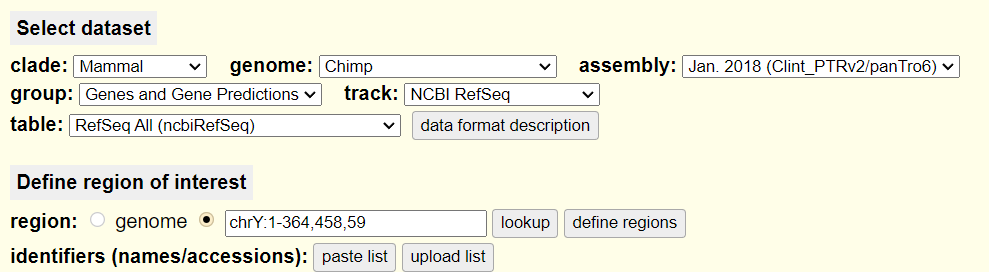

Задали все параметры. Скачиваем в формате Bed.

После нажатия get output выбираем "Whole Gene" и сохраняем

Опять обработаем при помощи пандаса - нужные столбцы именуем, ненужные - обозначаем-с цифрами!

In [ ]:
df_map = pd.read_table("hgTables.txt", skiprows=1, names=["chr","Start","End","Gene Name","1", "Strand", "2", "3", "4", "5", "6", "7"], delim_whitespace=True)

### 3. Наконец-то посчитаем число Z-участков и квадруплексов, попавших в ген/межген/пересечение.

#### Для начачла z-участки:

In [ ]:
Z_Cr = list(zip(z_dna["Start"], z_dna["End"]))
Gen_Cr = list(zip(df_map["Start"], df_map["End"], df_map["Strand"], df_map["Gene Name"]))

In [ ]:
Count_Inner, Count_Inter = 0, 0

for region in Z_Cr:
  for gene in Gen_Cr:
    if region[0] >= gene[0] and region[1] <= gene[1]:
      Count_Inner += 1
    elif (region[0] < gene[0] and region[1] > gene[0]) or (region[0] < gene[1] and region[1] > gene[1]):
      Count_Inter += 1
Count_Out= len(Z_Cr) - (Count_Inner + Count_Inter)

In [ ]:
print(Count_Inner, Count_Inter, Count_Out)

15694 14 85199


Получили, что для Z-участков:
1. 15694 участка попавших в какой-нибудь ген.
2. На пересечение гена и межгенного пространства
равно 14 участков.
3. Оставшиеся 85199 участков в межгенном пространстве.

#### Теперь квадруплексы:

In [ ]:
Count_Quad_Inner, Count_Quad_Inter = 0, 0

for region in PQS:
  for gene in Gen_Cr:
    if region[0] >= gene[0] and region[1] <= gene[1]:
      Count_Quad_Inner += 1
    elif (region[0] < gene[0] and region[1] > gene[0]) or (region[0] < gene[1] and region[1] > gene[1]):
      Count_Quad_Inter += 1
Count_Quad_Out= len(PQS) - (Count_Quad_Inner + Count_Quad_Inter)

И результат:

In [ ]:
print(Count_Quad_Inner, Count_Quad_Inter, Count_Quad_Out)

433 1 2937


Получили, что для квадруплексов:
1. 433 квадруплекса попавших в тот или иной ген.
2. На пересечение гена и межгенного пространства находится 1 квадруплекс.
3. Оставшиеся 2937 квадруплекса пребывают в межгенном пространстве.

### 4. Получим список генов, в промоторы которых попадает Z-ДНК.

In [ ]:
Find_Z = set()

for region in Z_Cr:
  for gene in Gen_Cr:

    if gene[2] == '+':
       if region[0] >= gene[0] - 1000 and region[1] <= gene[0]:
         Find_Z.add(gene[3])

    else:
        if region[0] >= gene[1] and region[1] <= gene[1] + 1000:
         Find_Z.add(gene[3])

print(len(Find_Z))

34


Сохраним названия в текстоовый файлик!

In [ ]:
with open('Results_Z-DNA.txt', "w", encoding='utf-8') as out:
  ind = 1

  for elem in Find_Z:
    out.write(elem)

    if ind  < len(Find_Z):
      out.write("\n")
      ind  += 1

### 5. Теперь получим список генов, в промоторы которых попали квадруплексы!

Делаем все абсолютно аналогично!

In [ ]:
Find_Quad = set()

for region in PQS:
  for gene in Gen_Cr:

    if gene[2] == '+':
       if region[0] >= gene[0] - 1000 and region[1] <= gene[0]:
         Find_Quad.add(gene[3])

    else:
        if region[0] >= gene[1] and region[1] <= gene[1] + 1000:
         Find_Quad.add(gene[3])

print(len(Find_Quad))

13


И также сохраним их в файлик!:)

In [ ]:
with open('Results_Quad.txt', "w", encoding='utf-8') as out:
  ind = 1

  for elem in Find_Quad:
    out.write(elem)

    if ind  < len(Find_Quad):
      out.write("\n")
      ind  += 1

### 6. Ура! Перейдем к последнему заданию!

##### Для Z-ДНК выведем связанные гены:

In [ ]:
Find_Z

{'NM_001009003.1',
 'NM_001102459.1',
 'XM_003318983.1',
 'XM_003318984.2',
 'XM_003949242.3',
 'XM_009439890.2',
 'XM_009439891.2',
 'XM_009439893.2',
 'XM_009445034.2',
 'XM_016944664.1',
 'XM_016944665.1',
 'XM_016944683.1',
 'XM_016944708.1',
 'XM_016944713.1',
 'XM_016944714.1',
 'XM_016944715.1',
 'XM_016944722.1',
 'XM_024354398.1',
 'XM_024354752.1',
 'XM_024356489.1',
 'XR_001714234.1',
 'XR_001714253.1',
 'XR_001714266.1',
 'XR_002942602.1',
 'XR_002942843.1',
 'XR_002943071.1',
 'XR_002943984.1',
 'XR_002944137.1',
 'XR_002944312.1',
 'XR_002944335.1',
 'XR_002944531.1',
 'XR_002944550.1',
 'XR_002944553.1',
 'XR_679046.3'}

Я написал код для конвертирования через сервер запросов с NCBI:

##### Для Z-ДНК

In [ ]:
from Bio import Entrez, SeqIO

# Установим email для запросов к NCBI
Entrez.email = "email@example.com"

# Определим функцию для получения названия белка из RefSeq ID
def get_protein_name(refseq_id):
    handle = Entrez.efetch(db="nuccore", id=refseq_id, rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")

    for feature in record.features:
        if feature.type == "gene":
          return feature.qualifiers.get("gene")[0]

# Преобразуем все RefSeq имена в названия белков
refseq_ids = list(Find_Z)
with open('Results_Z-DNA_Protein.txt', "w", encoding='utf-8') as out:
  for refseq_id in refseq_ids:
      out.write(get_protein_name(refseq_id) + "\n")



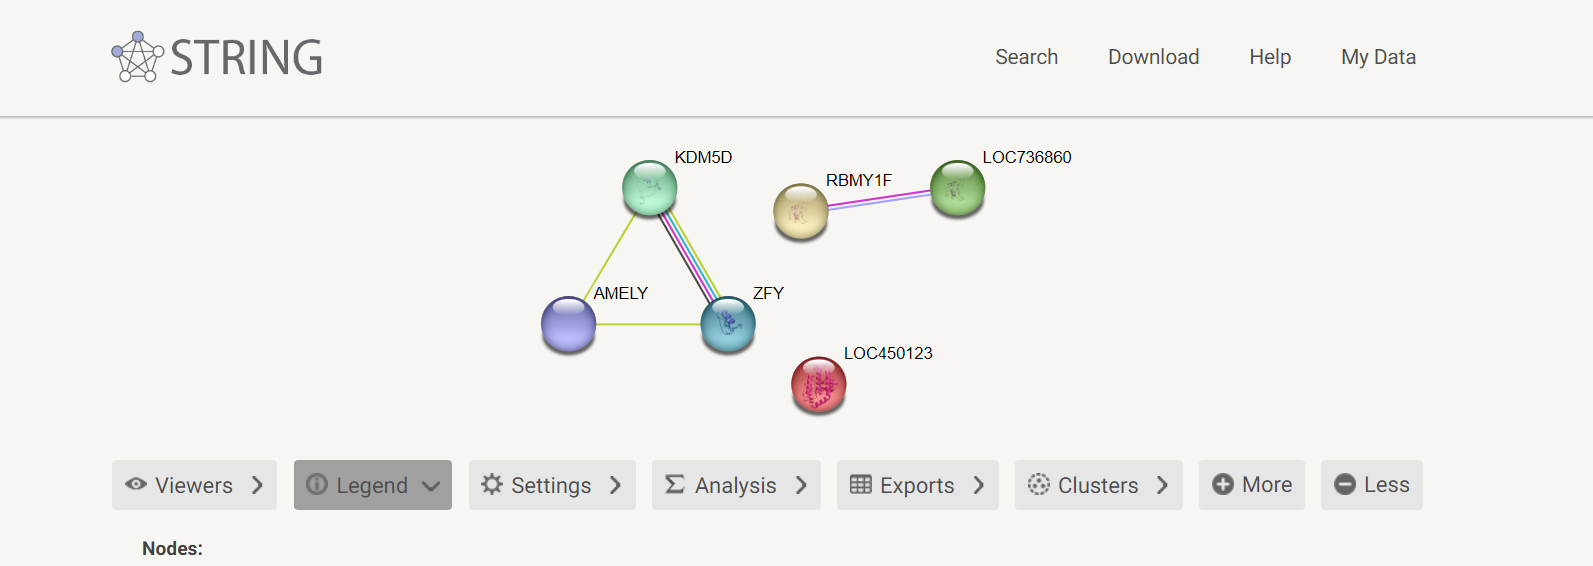

##### Для квадруплексов:

In [ ]:
from Bio import Entrez, SeqIO

# Установим email для запросов к NCBI
Entrez.email = "email@example.com"

# Определим функцию для получения названия белка из RefSeq ID
def get_protein_name(refseq_id):
    handle = Entrez.efetch(db="nuccore", id=refseq_id, rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")

    for feature in record.features:
        if feature.type == "gene":
          return feature.qualifiers.get("gene")[0]

# Преобразуем все RefSeq имена в названия белков
refseq_ids = list(Find_Quad)
with open('Results_Quad_Protein.txt', "w", encoding='utf-8') as out:
  for refseq_id in refseq_ids:
      out.write(get_protein_name(refseq_id) + "\n")



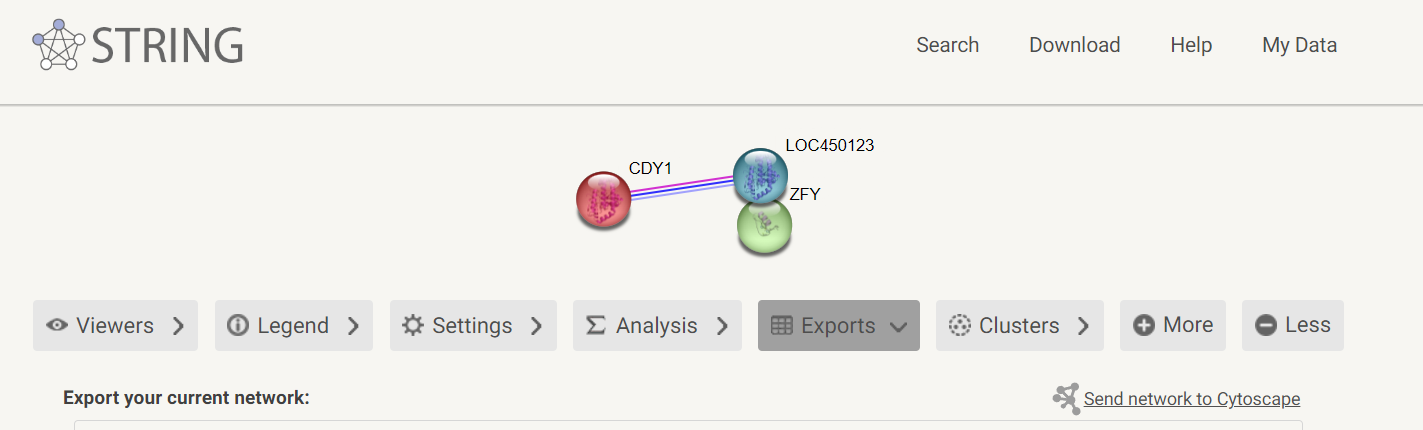

К сожалению, многие белки банально не нашлись, хотя я старался и все выглядит хорошо(

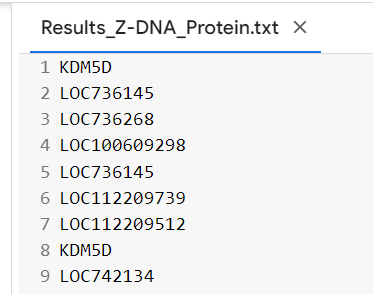

Ну ладно, работа сделана, а все результаты, в том числе таблицы со String-DB лежат на гугл диске - если проблемы с доступом, то напишите мне, пожалуйста в телеграм @HOPOLOS

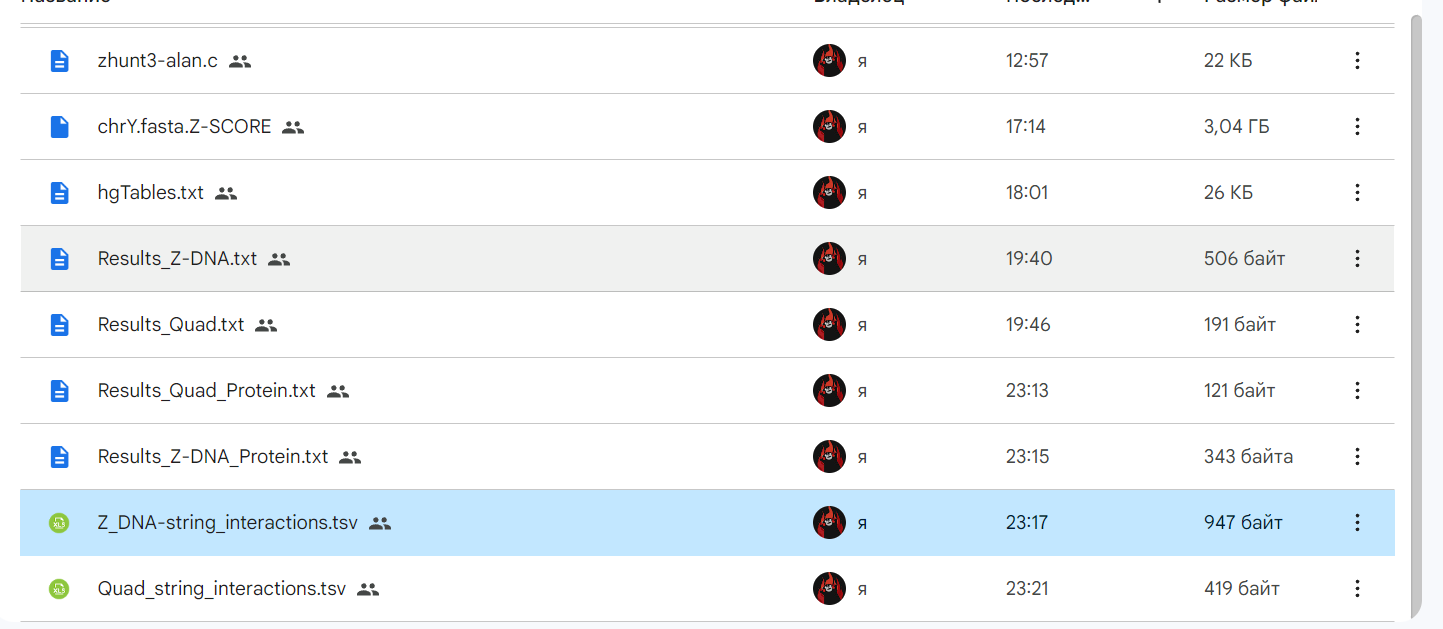

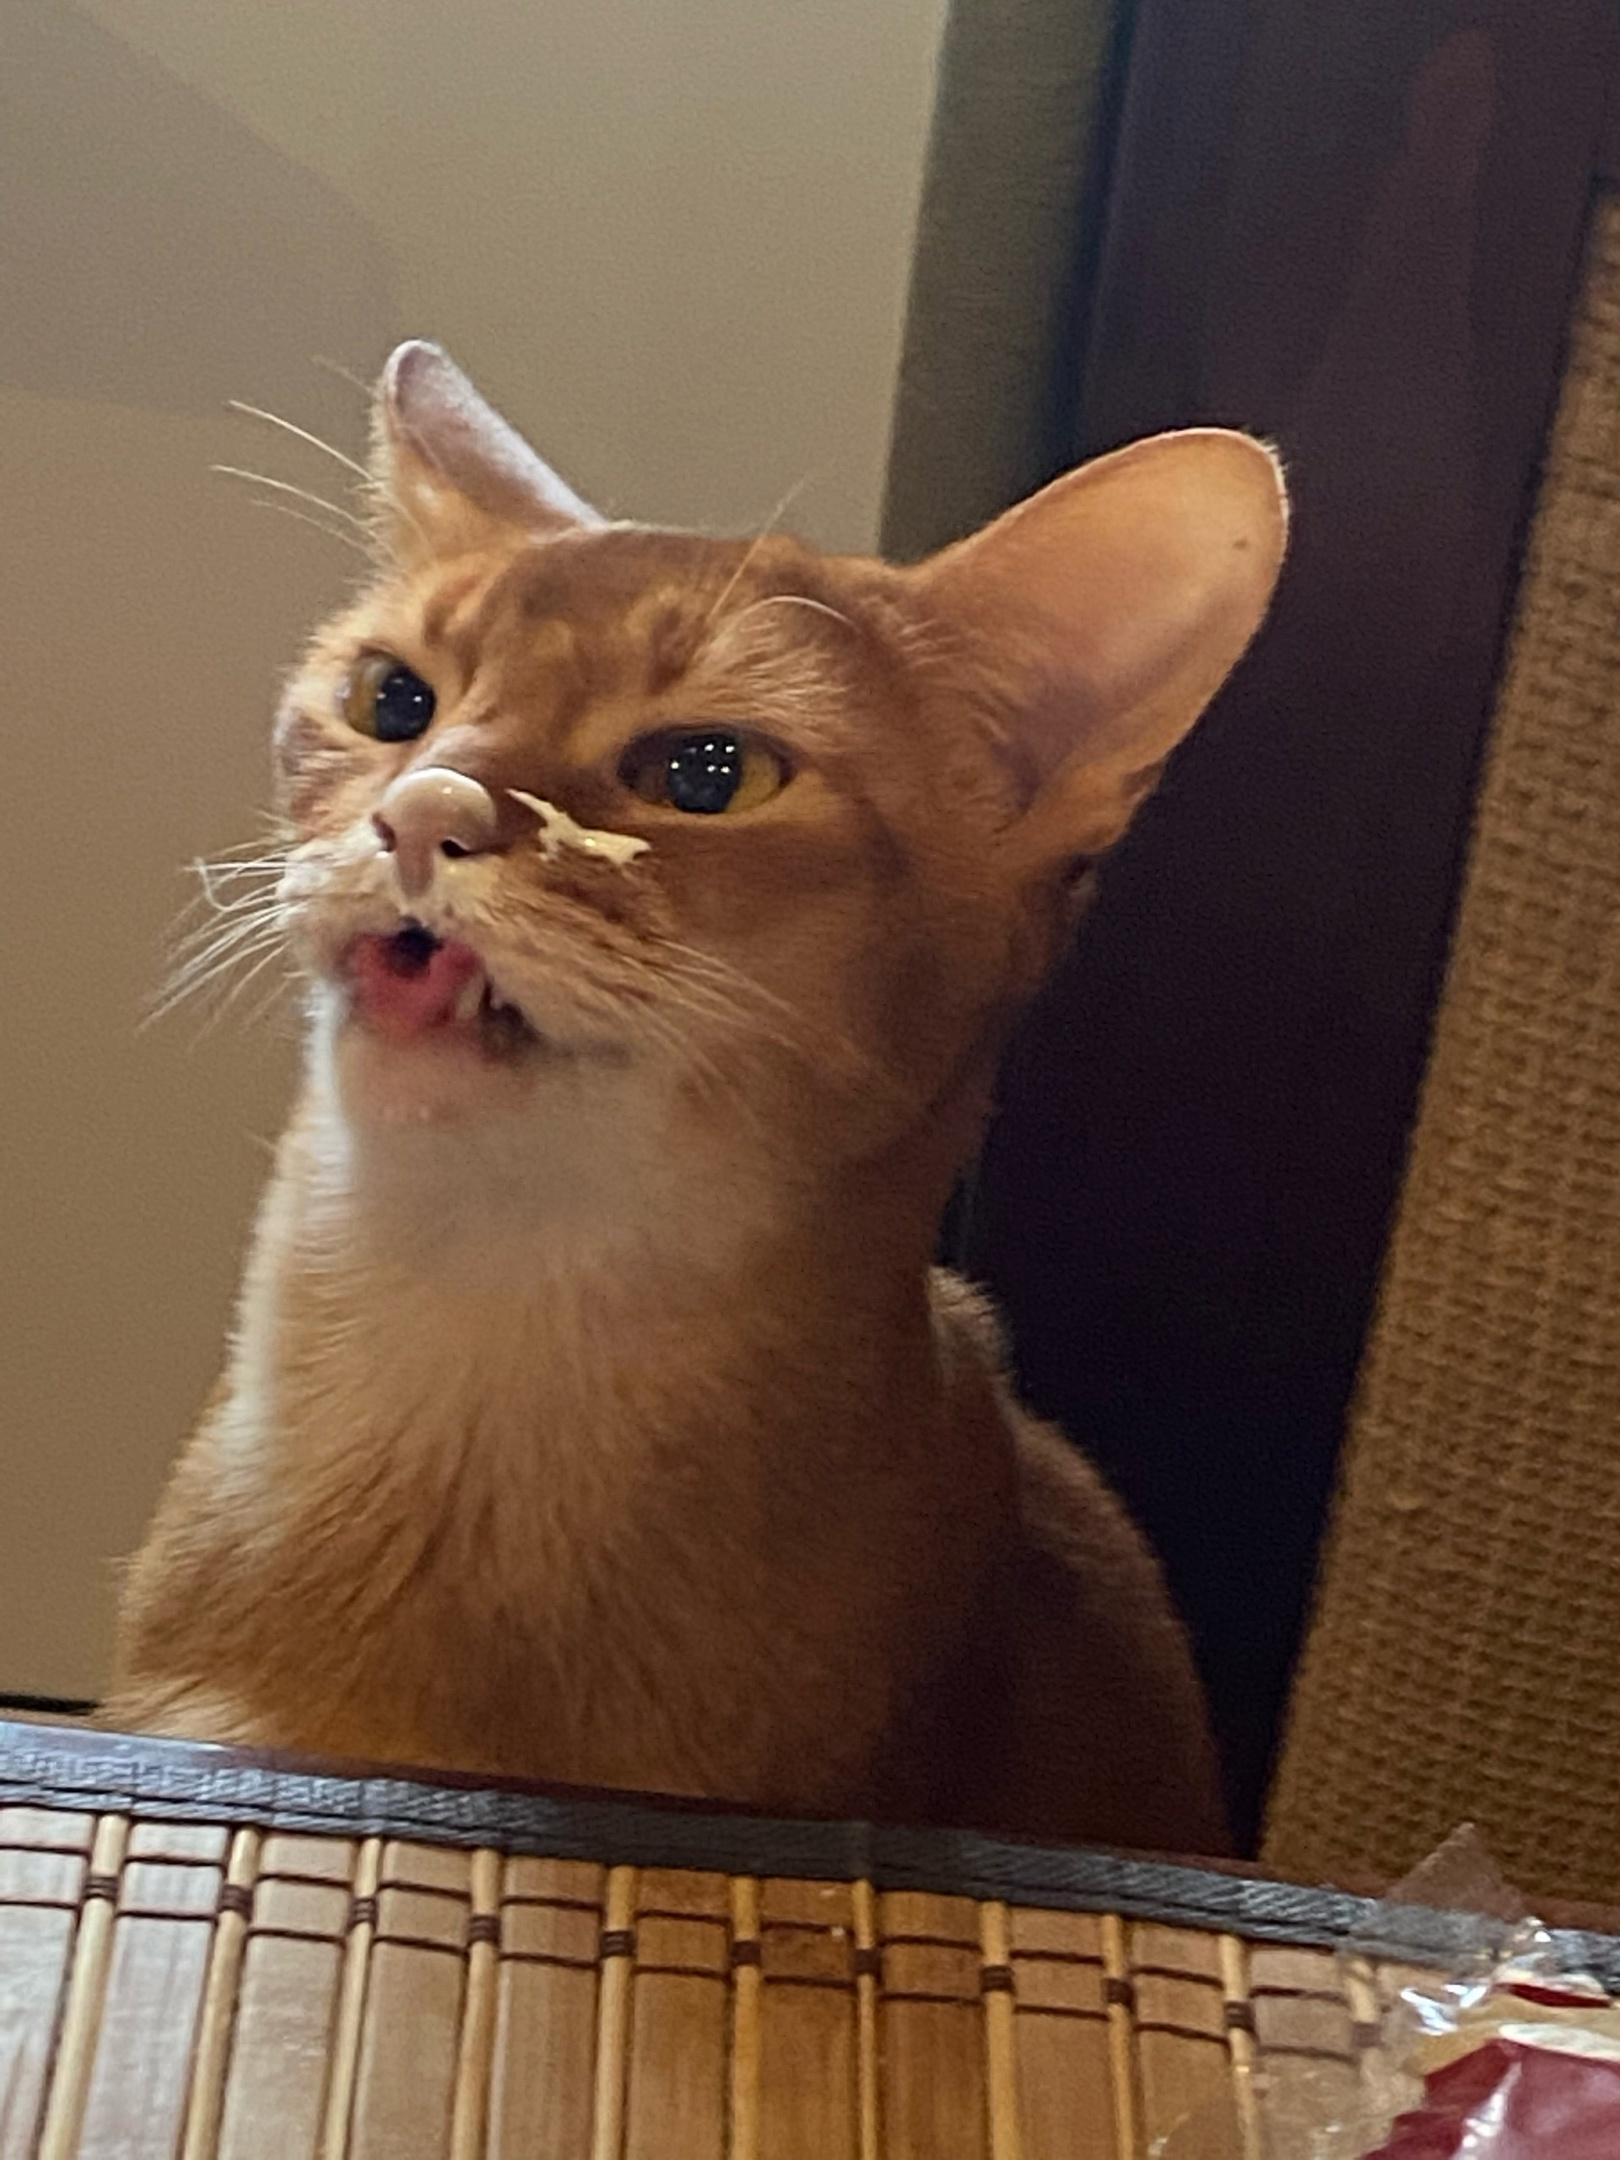